In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('../data/shop2_resto.csv', encoding="latin1")
df

,month_idx,hour_idx,mday_idx,year_idx,temperature,precipitation,snowfraction,sealevelpressure,winddirection,windspeed,...,is_resto,month.1,hour.1,mday.1,year.1,price,count,n_transactions,last_week_price,last_month_price
0,1,7,9,2018,2.20,NaN,NaN,1014.6,171.0,0.61,...,True,1.0,7.0,9.0,2018.0,1.50,1.00,1,NaN,NaN
1,1,7,11,2018,1.65,NaN,NaN,1014.7,256.0,0.82,...,True,1.0,7.0,11.0,2018.0,170.00,2.00,2,NaN,NaN
2,1,8,4,2018,5.88,1.5,NaN,1006.0,237.0,6.93,...,True,1.0,8.0,4.0,2018.0,1.50,1.00,1,NaN,NaN
3,1,8,8,2018,2.79,NaN,NaN,1018.7,56.0,2.88,...,True,1.0,8.0,8.0,2018.0,180.00,2.00,2,NaN,NaN
4,1,8,23,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,True,1.0,8.0,23.0,2018.0,1.50,1.00,1,NaN,NaN
5,1,8,24,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,True,1.0,8.0,24.0,2018.0,50.00,1.00,1,NaN,NaN
6,1,9,1,2018,5.51,NaN,NaN,1015.8,251.0,7.94,...,True,1.0,9.0,1.0,2018.0,42.80,12.00,1,NaN,NaN
7,1,9,2,2018,3.15,NaN,NaN,1018.3,263.0,7.85,...,True,1.0,9.0,2.0,2018.0,0.90,1.00,1,10166.05,10166.05
8,1,9,3,2018,11.36,0.5,NaN,1001.0,253.0,16.10,...,True,1.0,9.0,3.0,2018.0,6.35,2.00,2,NaN,NaN
9,1,9,4,2018,6.65,1.6,NaN,1005.0,236.0,6.77,...,True,1.0,9.0,4.0,2018.0,25.35,6.00,1,NaN,NaN


In [157]:
df.set_index(['month_idx','hour_idx','mday_idx','year_idx'],inplace = True)
df

temperature  precipitation  \
month_idx hour_idx mday_idx year_idx                               
1         7        9        2018             2.20            NaN   
                   11       2018             1.65            NaN   
          8        4        2018             5.88            1.5   
                   8        2018             2.79            NaN   
                   23       2018              NaN            NaN   
                   24       2018              NaN            NaN   
          9        1        2018             5.51            NaN   
                   2        2018             3.15            NaN   
                   3        2018            11.36            0.5   
                   4        2018             6.65            1.6   
                   5        2018             8.72            NaN   
                   6        2018             5.41            NaN   
                   7        2018             4.41            NaN   
                   13       2018             0.71            NaN   
                   14       2018              NaN            NaN   
                   15       2018             2.41            NaN   
                   18       2018             4.60            NaN   
                   20       2018             4.03            NaN   
                   21       2018              NaN            NaN   
                   24       2018              NaN            NaN   
                   25       2018              NaN            NaN   
                   26       2018              NaN            NaN   
          10       1        2018             6.28            NaN   
                   3        2018            10.45            0.9   
                   4        2018             7.69            1.2   
                   5        2018            10.25            NaN   
                   6        2018             7.40            NaN   
                   7        2018             7.56            NaN   
                   8        2018             7.06            NaN   
                   10       2018             6.33            NaN   
...                                           ...            ...   
12        17       28       2017            -1.40            NaN   
                   29       2017             0.03            NaN   
                   30       2017             8.98            NaN   
                   31       2017             8.83            NaN   
          18       1        2017             1.45            NaN   
                   2        2017            -1.96            NaN   
                   5        2017             2.32            NaN   
                   6        2017             2.68            NaN   
                   7        2017             2.98            NaN   
                   9        2017            -2.36            NaN   
                   11       2017             5.34            0.2   
                   12       2017             2.58            NaN   
                   13       2017             3.96            NaN   
                   16       2017             1.58            NaN   
                   17       2017            -0.78            NaN   
                   20       2017             1.41            NaN   
                   21       2017             4.01            1.4   
                   22       2017             5.69            NaN   
                   26       2017             3.90            NaN   
                   28       2017            -0.68            NaN   
                   31       2017             8.66            NaN   
          19       21       2017             3.74            1.3   
          20       8        2017            -0.48            NaN   
                   21       2017             3.72            1.0   
                   29       2017             1.28            0.8   
          21       9        2017            -3.58            NaN   
                   29     

In [158]:
#df_juckerhof = df.loc[u'Juckerhof Seegräben']
#df_juckerhof

In [159]:
#x_juck_res = df_juckerhof[(df_juckerhof['is_resto'] == True)]
x_juck_res = df[(~df['temperature'].isnull())]
x_juck_res = x_juck_res.fillna(0)

#one-hot
x_juck_res = pd.get_dummies(x_juck_res, prefix=['weekday', 'month','year','hour'], columns=['wday_x', 'month','year','hour'])

x_juck_res

temperature  precipitation  \
month_idx hour_idx mday_idx year_idx                               
1         7        9        2018             2.20            0.0   
                   11       2018             1.65            0.0   
          8        4        2018             5.88            1.5   
                   8        2018             2.79            0.0   
          9        1        2018             5.51            0.0   
                   2        2018             3.15            0.0   
                   3        2018            11.36            0.5   
                   4        2018             6.65            1.6   
                   5        2018             8.72            0.0   
                   6        2018             5.41            0.0   
                   7        2018             4.41            0.0   
                   13       2018             0.71            0.0   
                   15       2018             2.41            0.0   
                   18       2018             4.60            0.0   
                   20       2018             4.03            0.0   
          10       1        2018             6.28            0.0   
                   3        2018            10.45            0.9   
                   4        2018             7.69            1.2   
                   5        2018            10.25            0.0   
                   6        2018             7.40            0.0   
                   7        2018             7.56            0.0   
                   8        2018             7.06            0.0   
                   10       2018             6.33            0.0   
                   11       2018             4.83            0.0   
                   12       2018             2.78            0.0   
                   13       2018             1.85            0.0   
                   14       2018             1.56            0.0   
                   15       2018             4.06            0.0   
                   16       2018             7.58            0.2   
                   18       2018             5.58            0.0   
...                                           ...            ...   
12        17       27       2017             3.16            0.0   
                   28       2017            -1.40            0.0   
                   29       2017             0.03            0.0   
                   30       2017             8.98            0.0   
                   31       2017             8.83            0.0   
          18       1        2017             1.45            0.0   
                   2        2017            -1.96            0.0   
                   5        2017             2.32            0.0   
                   6        2017             2.68            0.0   
                   7        2017             2.98            0.0   
                   9        2017            -2.36            0.0   
                   11       2017             5.34            0.2   
                   12       2017             2.58            0.0   
                   13       2017             3.96            0.0   
                   16       2017             1.58            0.0   
                   17       2017            -0.78            0.0   
                   20       2017             1.41            0.0   
                   21       2017             4.01            1.4   
                   22       2017             5.69            0.0   
                   26       2017             3.90            0.0   
                   28       2017            -0.68            0.0   
                   31       2017             8.66            0.0   
          19       21       2017             3.74            1.3   
          20       8        2017            -0.48            0.0   
                   21       2017             3.72            1.0   
                   29       2017             1.28            0.8   
          21       9      

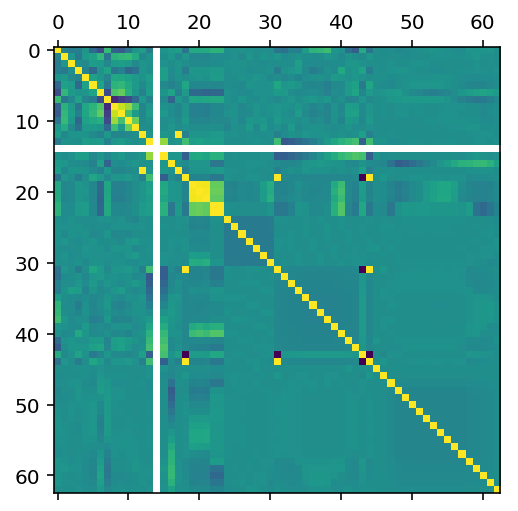

In [160]:
%config InlineBackend.figure_format = 'retina'

plt.matshow(x_juck_res.corr())
plt.show()

#x_juck_res.corr()

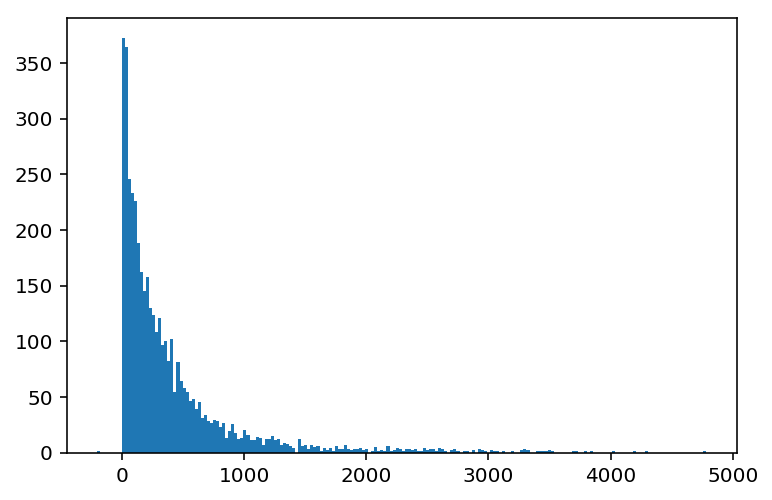

In [161]:
plt.hist(x_juck_res['price'],bins=200)
plt.show()


In [162]:
x_juck_res.columns.values

array([u'temperature', u'precipitation', u'snowfraction',
       u'sealevelpressure', u'winddirection', u'windspeed',
       u'relativehumidity', u'sunshinetime', u'totalcloudcover',
       u'lowclouds', u'midclouds', u'highclouds', u'mday', u'timestamp',
       u'is_resto', u'month.1', u'hour.1', u'mday.1', u'year.1', u'price',
       u'count', u'n_transactions', u'last_week_price',
       u'last_month_price', 'weekday_0.0', 'weekday_1.0', 'weekday_2.0',
       'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0',
       'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0',
       'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0',
       'month_11.0', 'month_12.0', 'year_2017.0', 'year_2018.0',
       'hour_0.0', 'hour_7.0', 'hour_8.0', 'hour_9.0', 'hour_10.0',
       'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0',
       'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_20.0',
       'hour_21.0', 'hour_22.0', 'hour_23.0'], dtyp

In [163]:
to_drop = [u'price',u'count',u'n_transactions']

features = x_juck_res.drop(to_drop,axis = 1).columns
features

Index([     u'temperature',    u'precipitation',     u'snowfraction',
       u'sealevelpressure',    u'winddirection',        u'windspeed',
       u'relativehumidity',     u'sunshinetime',  u'totalcloudcover',
              u'lowclouds',        u'midclouds',       u'highclouds',
                   u'mday',        u'timestamp',         u'is_resto',
                u'month.1',           u'hour.1',           u'mday.1',
                 u'year.1',  u'last_week_price', u'last_month_price',
            u'weekday_0.0',      u'weekday_1.0',      u'weekday_2.0',
            u'weekday_3.0',      u'weekday_4.0',      u'weekday_5.0',
            u'weekday_6.0',        u'month_1.0',        u'month_2.0',
              u'month_3.0',        u'month_4.0',        u'month_5.0',
              u'month_6.0',        u'month_7.0',        u'month_8.0',
              u'month_9.0',       u'month_10.0',       u'month_11.0',
             u'month_12.0',      u'year_2017.0',      u'year_2018.0',
               u'hou

In [164]:
X = x_juck_res[features]
y = x_juck_res[u'price']

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [166]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)


In [169]:
from sklearn.linear_model import Lasso

mdl_lasso = Lasso(alpha = 0.001)
mdl_lasso.fit(X_train,y_train)
mdl_lasso.predict(X_test)

print mdl_lasso.score(X_test,y_test)
coefficients = pd.DataFrame(data=mdl_lasso.coef_,index=features)
coefficients


0.556715245516


,0
temperature,9.218731e+00
precipitation,-2.007035e+01
snowfraction,2.361635e+01
sealevelpressure,-6.698593e-01
winddirection,-2.082991e-01
windspeed,-6.966258e+00
relativehumidity,-2.403700e+00
sunshinetime,-4.620894e-01
totalcloudcover,-6.690714e-01
lowclouds,-1.749807e-01
